## 用逻辑回归制作评分卡

在银行借贷场景中，评分卡是以分数形式来衡量一个客户信用风险大小的手段，它衡量想向别人借钱的人如果不能
如期履行合同中的还本付息责任，并让借钱给别人的人造成经济损失的可能性。一般来说，评分卡打出的分数越高，
客户的信用越好，风险越小。

借钱的实体可能是指个人，也可能是指公司和企业。对于企业来说，按照融资企业的融资用途分别使用企业融资模型、现金流融资模型、项目融资模型等模型。而对于个人来说，我们有四张卡来评估个人的信用程度：A卡、B卡、C卡、F卡。A卡被称为申请评分卡或者申请者评级模型，用来帮助金融机构来判断是否应该借钱给一个新用户。如果某一个人风险太高，我们就可以拒绝贷款

## 1 导库、读取数据、理解数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\DataSet\GiveMeSomeCredit\cs-training.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


每一个字段的含义：  

| 字段     | 字段的含义   |
|------  |------|
| SeriousDlqin2yrs | 出现90天或更长时间的逾期行为|
| RevolvingUtilizationOfUnsecuredLines  | 信用卡和个人可用额度的总和与信用限额之比 |
| age  | 借款人年龄|
| NumberOfTime30-59DaysPastDueNotWorse | 近两年内出现逾期35-59天的次数|
| DebtRatio  | 每月偿还债务，赡养费，生活费用除以当月总收入|
| MonthlyIncome  | 月收入|
| NumberOfOpenCreditLinesAndLoans  | 未偿还的贷款或信用额度的数量|
| NumberOfTimes90DaysLate  | 近两年内出现90天逾期或更坏的次数|
| NumberRealEstateLoansOrLines  | 抵押贷款和房地产贷款数量，包括房屋净值信贷额度|
| NumberOfTime60-89DaysPastDueNotWorse  | 近两年内出现60-89天逾期的次数|
| NumberOfDependents  | 家庭中不包括自身的家属人数（配偶、子女等）|

## 2 数据预处理

In [4]:
#查看数据的形状
data.shape

(150000, 11)

In [5]:
#查看数据集中每个字段的信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 2.1 重复值的处理

In [6]:
#检查数据中重复值的存在情况
data.duplicated().sum()

609

In [7]:
#过滤重复值
data.drop_duplicates(inplace=True)

In [8]:
#检查过滤效果
data.duplicated().sum()

0

In [9]:
#删除重复值后，需要重新恢复索引
data.index = range(data.shape[0])

In [10]:
#最后在检查一下数据的信息，看看索引有没有正确恢复
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 2.2 缺失值的处理

In [11]:
#检查数据集中每一个字段的数据缺失情况
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [12]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

从上面可以看到，MonthlyIncome和NumberOfDependents这两个字段存在缺失值。

NumberOfDependents字段的缺失率较小，大概只有2.5%，可以考虑之间删除或者用均值来填补。

MonthlyIncome字段缺失了几乎20%，并且收入对于信用评分来讲是一个很重要的因素，这个特征必须要填补。    
对于银行数据，我们可以有这样的推断：高收入或者稳定收入对于申请贷款是很有帮助的。如果是一个收入稳定良好的人，肯定会倾向于写上自己的收入情况，那么这些收入字段缺失的人，更可能是收入状况不稳定或者收入比较低的人。所以，我们可以采用四分位数来填补缺失值，把所有收入字段为空的客户都当成低收入群体。当然，也有可能这些缺失是银行数据收集过程中的失误导致的。具体采用什么样的手段来填补缺失值，要和业务人员沟通，观察缺失值是如何产生的。在这里，我们采用随机森林来填补缺失值。

In [13]:
#使用均值来填补NumberOfDependents字段的缺失值
a = data['NumberOfDependents'].mean()
data['NumberOfDependents'].fillna(a,inplace=True)

In [14]:
#检查填充情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [15]:
#利用随机森林来填补收入字段
#这种做法，对于某一个特征大量缺失，但是其他特征却很完整的情况比较适用
def fill_missing_rf(X,y,to_fill):
    """
    X：要填补的特征矩阵
    y：完整的、没有缺失值的标签
    to_fill：要填补的那一列的名称
    """
    
    #构建新的特征矩阵和标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    #找出训练集与测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    #利用随机森林来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [16]:
#准备数据
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [17]:
#得到随机森林模型的预测值
y_pred = fill_missing_rf(X,y,'MonthlyIncome')
y_pred

array([0.19, 0.39, 0.08, ..., 0.22, 0.08, 0.  ])

In [18]:
#使用预测值填充缺失值
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] = y_pred

In [19]:
#再次检查缺失值的情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 2.3 利用描述性统计来处理异常值

现实数据中总是存在一些异常值，我们要把这些异常值捕捉出来，然后观察他们的性质。有时候，我们可能是要将这些异常值去除，而有些时候异常值则是我们的重点研究对象。

日常处理异常值，往往使用箱型图或者3sigma法则来寻找异常值。

具体到银行数据中，在特征量有限的情况下，我们往往使用描述性统计方法来观察数据的异常以及数据的分布情况。

In [20]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.215468,13246.399323,0.0,0.0,0.180000,1800.000000,4425.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


通过仔细观察age可能存在一些异常值，它的最小值为0。一般能够在银行办理贷款业务的应该是成年人，即使是儿童账户应该也要8岁以上。

NumberOfTime30-59DaysPastDueNotWorse这个字段0-4次还是比较合理的，但是98次是不是有点太多了？

NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse这个字段的最大值为98，这个应该也是一个异常值。


In [21]:
#age字段中异常值的处理
#首先，我们可以查看一下年龄为0的人有多少
(data['age']==0).sum()

1

In [22]:
#我们查看一下年龄小于8岁的人有多少？
(data['age']<8).sum()

1

In [23]:
#最终可以确认，年龄小于8岁的人只有一个。推测可能是因为业务人员录入失误造成的。
#对于这样的异常值我们直接过滤掉即可
data = data[data['age'] != 0]

In [24]:
#接下来处理NumberOfTime30-59DaysPastDueNotWorse，NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse
#这三个字段中都存在非常大的异常值
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     125453
1      16032
2       4598
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [25]:
#可以看到96和98明显属于异常值,共有225个。我们把他们全部过滤掉
data = data[data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']<90]

In [26]:
#观察NumberOfTimes90DaysLate字段
data['NumberOfTimes90DaysLate'].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
12         2
14         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [27]:
#观察NumberOfTime60-89DaysPastDueNotWorse字段
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     141830
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [28]:
#这说明这三个字段的异常值来自于相同的记录。当我们进行针对其中一个进行过滤后，其余两个的异常值就解决了
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [29]:
#过滤数据之后需要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

### 2.4 数据集的不均衡问题

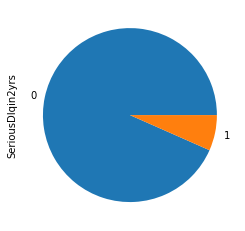

In [30]:
data['SeriousDlqin2yrs'].value_counts().plot(kind='pie')

In [31]:
#我们采用过采样法来在原始数据集上进行采样，以得到一组均衡的数据

#数据准备
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [32]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X,y = sm.fit_sample(X,y)

Using TensorFlow backend.


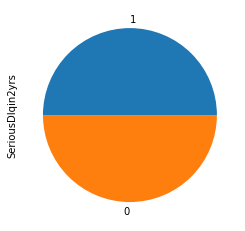

In [33]:
y.value_counts().plot(kind='pie')

In [34]:
X.shape

(278584, 10)

### 2.5 将数据集拆分为训练集与测试集

In [35]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3)

In [36]:
Y_train

,SeriousDlqin2yrs
24607,0
54822,0
219321,1
106438,0
25862,0
...,...
48114,0
52626,0
165827,1
2026,0


In [37]:
#将用于训练模型的数据的特征和标签合并在一起
model_data = pd.concat([Y_train,X_train],axis=1)
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
24607,0,0.292808,35,0,0.374806,4500.000000,9,0,1,0,2.000000
54822,0,0.393138,71,0,2406.000000,0.440000,15,0,2,0,0.000000
219321,1,0.617309,53,1,0.327845,7083.000000,6,0,0,0,0.974585
106438,0,0.018839,33,0,0.410392,6600.000000,12,0,2,0,3.000000
25862,0,0.020957,57,0,0.003104,14175.000000,2,0,0,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
48114,0,0.014797,41,0,0.386556,8166.000000,7,0,1,0,2.000000
52626,0,0.000623,37,0,694.000000,0.870000,5,0,1,0,0.000000
165827,1,0.936524,39,0,1335.970742,0.386303,3,1,0,0,1.194148
2026,0,0.283931,55,0,1.515459,4333.000000,14,0,2,0,2.000000


In [38]:
#数据集在拆分的时候会被打乱顺序，所以我们在合并之后还是要恢复索引
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [39]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.292808,35,0,0.374806,4500.00,9,0,1,0,2.000000
1,0,0.393138,71,0,2406.000000,0.44,15,0,2,0,0.000000
2,1,0.617309,53,1,0.327845,7083.00,6,0,0,0,0.974585
3,0,0.018839,33,0,0.410392,6600.00,12,0,2,0,3.000000
4,0,0.020957,57,0,0.003104,14175.00,2,0,0,0,2.000000


In [40]:
#将用于验证模型的特征和标签合并在一起
vali_data = pd.concat([Y_vali,X_vali],axis=1)
#恢复索引
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

## 3 分箱

在评分卡制作过程中一个最重要的步骤就是分箱。分箱是评分卡最难也是最核心的思路。分箱的本质就是离散化连续变量，好让拥有不同属性的人被分成不同的类别。

1.要分成多少个箱子才合适？

首先，箱子的个数不能太多，最好控制在10个以下，4到5个为最佳。另外，离散化连续型变量必然伴随着信息的损失，并且箱子越少，损失的信息越多。为了衡量特征上的信息量以及特征对预测函数的贡献，银行业定义了一个概念叫做information value(IV):

$ \mathrm{IV}=\sum_{i=1}^{\mathrm{N}}(\operatorname{good} \%-\mathrm{bad} \%) * \mathrm{WOE}_{\mathrm{i}} $

N是这个特征中分箱的个数，i代表每个箱子，good%是这个箱子内的优质客户占整个特征中所有优质客户的比例。bad%是这个箱子里的坏客户占整个特征中所有坏客户的比例。

$\mathrm{WOE}_{\mathrm{i}}=\ln \left(\frac{\operatorname{good} \%}{\mathrm{bad} \%}\right)$

这是在银行业中用来衡量违约概率的指标。中文叫做证据权重，本质其实就是优质客户比上坏客户比例的对数。对于一个箱子来说，WOE越大就说明这个箱子里的优质客户越多。IV代表的意义如下表所示：

| IV     | 特征对预测函数的贡献   |
|------  |------|
| <0.03  | 特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除|
| 0.03~0.09  | 有效信息很少，对模型的贡献度低|
| 0.1~0.29  | 有效信息一般，对模型的贡献度中等|
| 0.3~0.49  | 有效信息很多，对模型的贡献度较高|
| >=0.5  | 有效信息非常多，对模型贡献超高并且可疑|

我们会对特征进行分箱，然后计算每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

2.分箱要达成什么样的效果？

希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的属性是尽量不同的。即组间差异大，组内差异小。对于评分卡来说，我们希望一个箱子内的人违约概率是类似的，而不同箱子的人违约概率差距很大，并且每个箱子中坏客户占的比重不同。我们可以使用卡方检验来对比两个箱子的相似性。如果两个箱子之间卡方检验的P值很大，则说明他们非常相似，那我们就可以将这两个箱子合并为1个箱子。

3.基于上述的思想，我们总结出对特征进行分箱的步骤：

第一，把连续型变量分成数量较多的分类型变量，比如，将几万个样本分成100组或50组。  
第二，确保每一组中都要包含两种类别的样本，否则IV值无法计算。   
第三，对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据的组数小于设定的N箱为止。   
第四，观察不同分箱个数下IV值的变化，找出最合适的分箱个数（在信息损失尽可能小的情况下，减少分箱的个数）。 

### 3.1 对特征进行人工等频分箱，然后为每个特征寻找最优区间划分方法

In [41]:
#实验一下
model_data['qcut'], updown = pd.qcut(model_data['age'],retbins=True,q=20)

count_y0 = model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']

num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]

columns = ['min','max','count_0','count_1']
df = pd.DataFrame(num_bins,columns=columns)
df.head()

,min,max,count_0,count_1
0,21.0,28.0,4242,7581
1,28.0,31.0,3490,5949
2,31.0,34.0,4051,6844
3,34.0,36.0,2919,4761
4,36.0,39.0,5158,7549


In [42]:
import scipy
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验
    
    参数：
    DF:需要输入的数据
    X:需要分箱的列名
    Y:分箱数据对应的标签
    n:保留分箱的个数
    q:初始分箱的个数
    graph:是否要画出IV图像
    
    区间为前开后闭
    
    """
    DF = DF[[X,Y]].copy()
    bins_df = 0
    
    #先把数据分成q箱
    DF['qcut'], bins = pd.qcut(DF[X],retbins=True,q=q,duplicates='drop')
    count_y0 = model_data[DF[Y]==0].groupby(by='qcut').count()[Y]
    count_y1 = model_data[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]
    
    #如果某个箱子里有0，就进行合并。保证每个箱子中正负样本的数量都不为0
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],
                              num_bins[1][1],
                              num_bins[0][2]+num_bins[1][2],
                              num_bins[0][3]+num_bins[1][3]
                             )]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],
                                  num_bins[i][1],
                                  num_bins[i-1][2]+num_bins[i][2],
                                  num_bins[i-1][3]+num_bins[i][3]
                                 )]
            break
        else:
            break
    
    #计算woe函数
    def get_woe(num_bins):
        columns = ['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns=columns)

        df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
        df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
        df['bad_rate'] = df.count_1 / df.total  
        df['good%'] = df.count_0 / df.count_0.sum()
        df['bad%'] = df.count_1 / df.count_1.sum()
        df['woe'] = np.log(df['good%']/df['bad%'])
        return df
    
    #计算IV值的函数
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate * df.woe)
        return iv
    
    #利用卡方值合并箱体，合并完毕之后计算woe与IV值。
    IV = []
    axisx = []

    while len(num_bins) > n:
        pvs = []
        #获得num_bins两两之间的卡方值
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        #合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                      num_bins[i][0],
                      num_bins[i+1][1],
                      num_bins[i][2]+num_bins[i+1][2],
                      num_bins[i][3]+num_bins[i+1][3]
                                    )]
        bins_df = get_woe(num_bins)
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    #绘图
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel('number of box')
        plt.ylabel('IV value')
        plt.show()
    
    return bins_df

RevolvingUtilizationOfUnsecuredLines


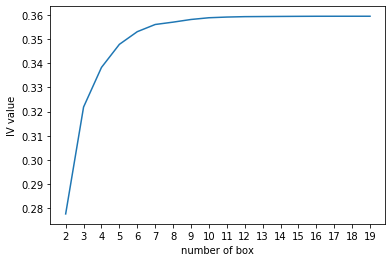

age


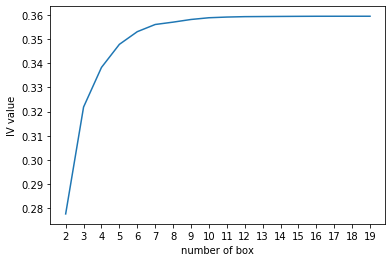

NumberOfTime30-59DaysPastDueNotWorse


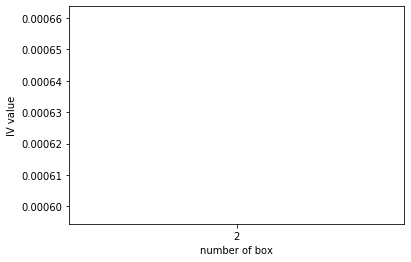

DebtRatio


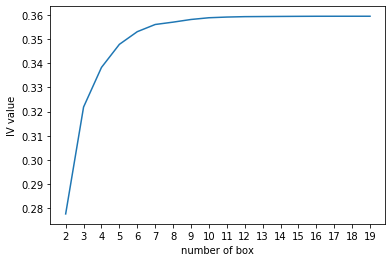

MonthlyIncome


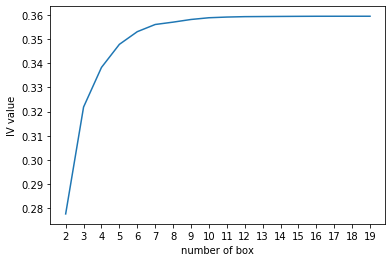

NumberOfOpenCreditLinesAndLoans


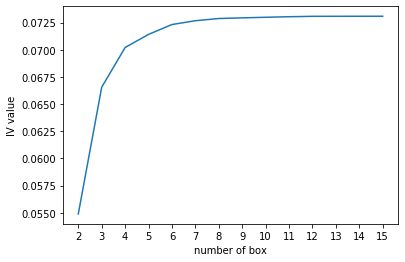

NumberOfTimes90DaysLate


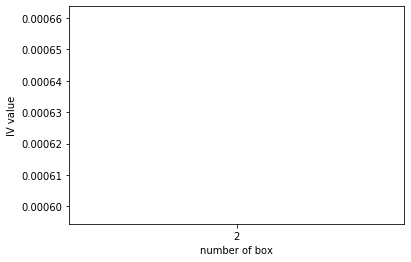

NumberRealEstateLoansOrLines


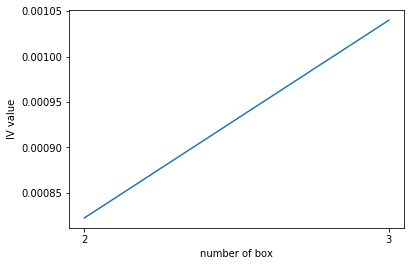

NumberOfTime60-89DaysPastDueNotWorse


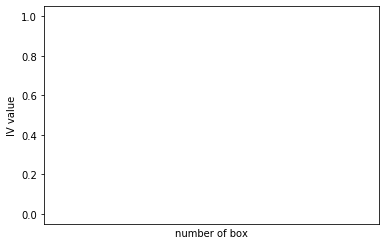

NumberOfDependents


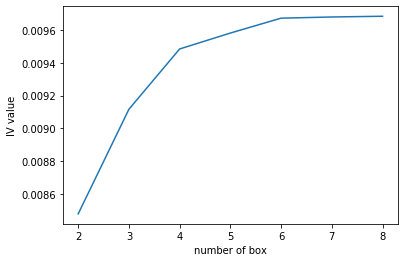

In [43]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2,q=20)

能够正常的自动分箱的特征有：  
1 RevolvingUtilizationOfUnsecuredLines : 6   
2 age : 5   
3 DebtRatio : 4   
4 MonthlyIncome : 3   
5 NumberOfOpenCreditLinesAndLoans : 5   

自动分箱存在问题的特征有：  
1 NumberOfTime30-59DaysPastDueNotWorse   
2 NumberOfTimes90DaysLate   
3 NumberRealEstateLoansOrLines   
4 NumberOfTime60-89DaysPastDueNotWorse   
5 NumberOfDependents   

In [44]:
#对于不能够进行自动分箱的特征，我们需要观察这些特征，手动设置这些特征的区间划分
hand_bins = {
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
    'NumberOfTimes90DaysLate':[0,1,2,17],
    'NumberRealEstateLoansOrLines':[0,1,2,4,54],
    'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
    'NumberOfDependents':[0,1,2,3]
}

#为了保证区间全覆盖，我们使用np.inf来替换区间的最大值，使用-np.inf来替换区间的最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [45]:
#对于能够使用函数进行自动分箱的特征，我们已经找到了他们的最佳分箱个数
auto_col_bins = {
    'RevolvingUtilizationOfUnsecuredLines':6,
    'age':5,
    'DebtRatio':4,
    'MonthlyIncome':3,
    'NumberOfOpenCreditLinesAndLoans':5
}

#利用我们找到的最佳分箱个数来找到相应的区间划分
bins_of_col = {}

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,
                              col,
                              'SeriousDlqin2yrs',
                              n=auto_col_bins[col],
                              q=20,
                              graph=False)
    
    #将区间上界的集合与区间下界的集合合并，并且按照从小到大进行排序
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    
    #为保证区间覆盖
    bins_list[0],bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list

In [46]:
#Python字典中的update方法：将字典2中的键值对更新到字典1中
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0600298936,
  0.7212722306499999,
  0.9338410534408832,
  0.9819926464600593,
  1.0186942255543843,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.571942974, 1.4636922988215577, 2346.0, inf],
 'MonthlyIncome': [-inf, 5600.0, 7713.895102171025, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 4.0, 9.0, 12.0, 13.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

### 3.2 利用计算好的区间划分方法为每个特征进行分箱

In [47]:
#一个新的get_woe函数，用于按照之前的区间划分进行分箱
#为每个分箱计算相应的woe值，用于之后的实际分箱之后的映射
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df['cut'] = pd.cut(df[col],bins)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))
    
    return woe

In [48]:
#将所有特征进行get_woe操作，然后，将计算出的结果存储到一个字典中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])

woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.06]      2.431317
 (0.06, 0.721]     0.090728
 (0.721, 0.934]   -1.284959
 (0.934, 0.982]   -1.515290
 (0.982, 1.019]   -0.662113
 (1.019, inf]     -2.093454
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.537303
 (36.0, 54.0]   -0.276776
 (54.0, 61.0]    0.254463
 (61.0, 74.0]    1.011028
 (74.0, inf]     1.723781
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.572]      0.059598
 (0.572, 1.464]    -0.506913
 (1.464, 2346.0]    0.177824
 (2346.0, inf]      0.183101
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 5600.0]       -0.126142
 (5600.0, 7713.895]    0.068484
 (7713.895, inf]       0.363981
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 4.0]    -0.367587
 (4.0, 9.0]      0.083529
 (9.0, 12.0]     0.131700
 (12.0, 13.0]    0.165273
 (13.0, inf]     0.262089
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.354262
 (0.0, 1.0]    -0.883368
 (1.0, 2.0]    -1.373025
 (2.0, inf]    -1.

In [49]:
#将所有的woe值映射到原始数据中

#由于不希望覆盖掉原本的数据，所以我们提前创建一个原始数据索引相同的DataFrame
model_woe = pd.DataFrame(index=model_data.index)

#对所有特征进行分箱与woe映射操作
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [50]:
model_woe

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.090728,-0.537303,0.059598,-0.126142,0.083529,0.354262,0.234325,0.197030,0.12537,-0.530436
1,0.090728,1.011028,0.183101,-0.126142,0.262089,0.354262,0.234325,0.631225,0.12537,0.660103
2,0.090728,-0.276776,0.059598,0.068484,0.083529,-0.883368,0.234325,-0.398853,0.12537,-0.527457
3,2.431317,-0.537303,0.059598,0.068484,0.131700,0.354262,0.234325,0.631225,0.12537,-0.471688
4,2.431317,0.254463,0.059598,0.363981,-0.367587,0.354262,0.234325,-0.398853,0.12537,-0.530436
...,...,...,...,...,...,...,...,...,...,...
195003,2.431317,-0.276776,0.059598,0.363981,0.083529,0.354262,0.234325,0.197030,0.12537,-0.530436
195004,2.431317,-0.276776,0.177824,-0.126142,0.083529,0.354262,0.234325,0.197030,0.12537,0.660103
195005,-1.515290,-0.276776,0.177824,-0.126142,-0.367587,0.354262,-1.738011,-0.398853,0.12537,-0.530436
195006,0.090728,0.254463,0.177824,-0.126142,0.262089,0.354262,0.234325,0.631225,0.12537,-0.530436


In [51]:
#将标签补充到数据中
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.090728,-0.537303,0.059598,-0.126142,0.083529,0.354262,0.234325,0.197030,0.12537,-0.530436,0
1,0.090728,1.011028,0.183101,-0.126142,0.262089,0.354262,0.234325,0.631225,0.12537,0.660103,0
2,0.090728,-0.276776,0.059598,0.068484,0.083529,-0.883368,0.234325,-0.398853,0.12537,-0.527457,1
3,2.431317,-0.537303,0.059598,0.068484,0.131700,0.354262,0.234325,0.631225,0.12537,-0.471688,0
4,2.431317,0.254463,0.059598,0.363981,-0.367587,0.354262,0.234325,-0.398853,0.12537,-0.530436,0


In [52]:
#处理完训练集还要对测试集进行处理
vali_woe = pd.DataFrame(index=vali_data.index)

#对测试集的所有特征进行分箱与woe映射操作
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])

#将标签补充到数据中
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']

In [53]:
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-1.284959,-0.537303,0.059598,-0.126142,-0.367587,0.354262,0.234325,-0.398853,0.125370,0.660103,1
1,0.090728,-0.276776,0.059598,0.068484,0.083529,-0.883368,0.234325,-0.398853,0.125370,-0.530436,1
2,-2.093454,-0.276776,0.059598,-0.126142,-0.367587,0.354262,0.234325,-0.398853,-1.398259,-0.471688,1
3,0.090728,-0.537303,0.183101,-0.126142,0.131700,0.354262,0.234325,0.631225,0.125370,0.660103,0
4,0.090728,0.254463,0.059598,-0.126142,0.083529,0.354262,0.234325,0.197030,0.125370,0.660103,0


## 4 建立模型与模型验证 

逻辑回归是一种名为回归的线性分类器，其本质是由线性回归变化而来的。

线性回归算法的假设函数：  
$\mathrm{y}(\mathrm{x})=\theta_{0}+\theta_{1} \mathrm{x}_{1}+\theta_{2} \mathrm{x}_{2}+\cdots+\theta_{\mathrm{n}} \mathrm{x}_{\mathrm{n}}=\theta^{\mathrm{T}} \mathrm{x}$

$\theta$被统称为模型的参数，$\theta_{0}$被称为截距（intercept），$\theta_{1}$-$\theta_{n}$被称为系数（coefficient）。

逻辑回归算法的假设函数就是在线性回归的基础上加入了Sigmoid函数：$g(z)=\frac{1}{1+e^{-z}}$，所以逻辑回归算法的假设函数为：

$\mathrm{y}(\mathrm{x})=\frac{1}{1+\mathrm{e}^{-\theta^{\mathrm{T}} \mathrm{x}}}$


In [54]:
#准备训练数据
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

#准备测试数据
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [55]:
#建立逻辑回归模型
from sklearn.linear_model import LogisticRegression as LR
lr = LR()

In [56]:
#模型训练
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#模型评估--正确率
lr.score(vali_x,vali_y)

0.7720039245716473

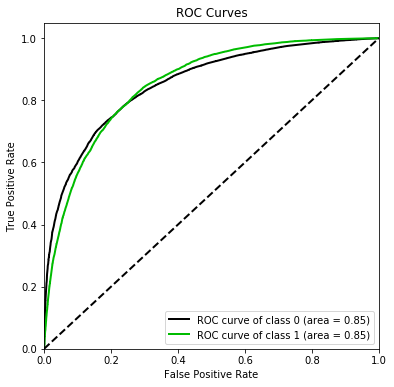

In [58]:
#模型评估--ROC曲线
import scikitplot as skplt

#某个标签为正例和负例的概率
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))

skplt.metrics.plot_roc(vali_y,
                       vali_proba_df,
                       plot_micro=False,
                       figsize=(6,6),
                       plot_macro=False
                      )

从正确率上来看，这个模型的正确率只有不到80%，稍微低了一点。但是从ROC曲线来看，这个模型的整体性能还是不错的。
综合来看，这个模型基本可以满足要求。

## 5 制作评分卡

在建立逻辑回归模型之后，我们需要将这个模型转化为一个更加直观、更加容易部署的形式，也就是制成评分卡。标准评分卡能够一眼看出每一个变量的值落在哪个区间应该得多少分。

评分卡的总分数计算方法：Score = A + B*log⁡(odds) / Score = A - B*log⁡(1/odds)   
odds为好用户概率与坏用户概率的比值：odds = p_good / p_bad   

A、B是两个常数，他们的求法为：

设置odds为$\theta$时，特定分值为P；odds为$2\theta$时，特定的分值为P+PDO    
$P=A+B * \ln (\theta)$  
$P+P D O=A+B * \ln (2 \theta)$    

能够得到：   
$A=\frac{P D O}{\ln 2}$  
$B=A+B * \ln (\theta)$   

例如，1/odds为1/60时设定的分数为600，PDO=20,那么对数几率为1/30时的分数就是620。将这两组数据代入到评分卡的数学表达式中，可以得到：   
$600=A-B * \log \left(\frac{1}{60}\right)$  
$620=A-B * \log \left(\frac{1}{30}\right)$   

假设，w0是逻辑回归模型的截距，w1-wn为逻辑回归模型的权重。   
基础分数：A + B*w0   
B x w1到B x wn是每个变量对应的分数   
每个变量对应的分数乘以变量中每个分箱的woe值就能够得到每个分箱的评分结果   

In [59]:
B = 20 / np.log(2)
A = 600 + B * np.log(1/60)

In [60]:
#基础分
base_score = A - B * lr.intercept_
base_score

array([481.51862115])

In [61]:
# #我们可以通过循环，将所有特征的评分卡内容全部一次性的写入一个本地文件ScoreData.csv

file = "D:\DataSet\GiveMeSomeCredit\ScoreData.csv"
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))

In [62]:
for i,col in enumerate(x.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")